In [43]:
## Pre-work

# Import the required libraries and dependencies
import pandas as pd
import csv
from pathlib import Path
%matplotlib inline


In [59]:
# Import CSV as Dataframe
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_navs_csv = pd.read_csv(
    Path('./Resources/whale_navs.csv'),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True
)

# Review the first and last 5 rows of the DataFrame
display(whale_navs_csv.head())
display(whale_navs_csv.tail())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79
2020-09-10,31.486896,14.388256,63.308920,64.306412,333.89
2020-09-11,31.473747,14.360482,63.281442,64.241088,334.06


In [61]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns

# Using the Pandas isnull function in conjunction with the sum function, check the DataFrame for missing values
display(whale_navs_csv.isnull().sum())

# Drop any rows with all missing values
daily_returns = whale_navs_csv.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
display(daily_returns.head())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
S&P 500                        0
dtype: int64

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


In [46]:
# Use the describe function to review summary stats including the standard deviation and mean.
daily_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,-0.000009,-0.000026,0.000036,0.000147,0.000429
std,0.001405,0.002199,0.000996,0.003256,0.011550
min,-0.012910,-0.016720,-0.014563,-0.019076,-0.109424
25%,-0.000381,-0.000534,-0.000193,-0.001082,-0.003197
50%,0.000004,-0.000012,0.000007,0.000027,0.000549
75%,0.000440,0.000498,0.000240,0.001515,0.005160
max,0.011505,0.015944,0.010128,0.021761,0.090603


<AxesSubplot:title={'center':'Daily Returns of the 4 funds and the S&P 500'}, xlabel='date'>

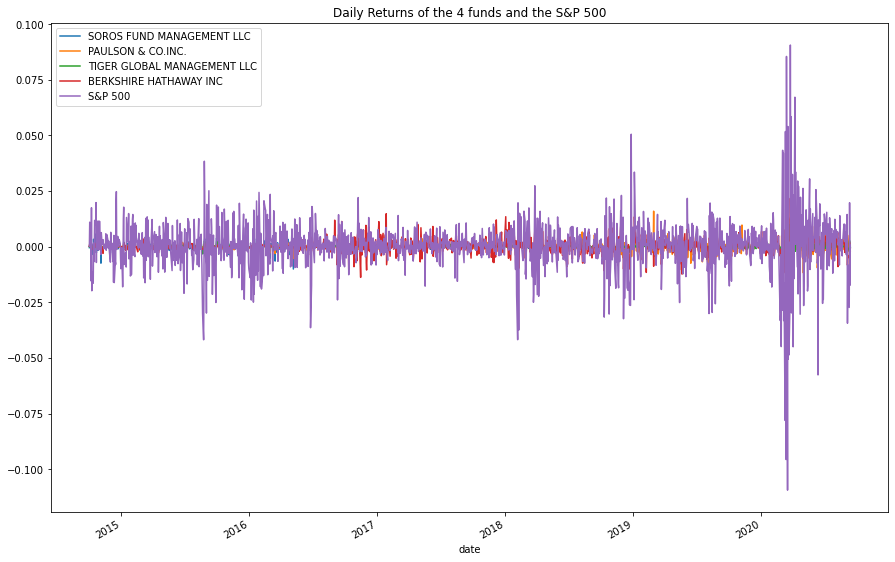

In [47]:
## Quantatative Analysis
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(figsize=(15,10), title='Daily Returns of the 4 funds and the S&P 500')

In [48]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,0.999558,1.000150,1.000013,1.000171,1.000154
2014-10-03,1.000609,1.000518,1.000407,1.001420,1.011165
2014-10-06,1.003066,1.000510,1.000474,1.001688,1.009982
2014-10-07,1.000437,1.000193,1.000265,1.001100,0.994392
2014-10-08,1.000828,1.000563,1.000507,1.001943,1.011783


<AxesSubplot:title={'center':'Cumulative Returns of the 4 funds and the S&P 500'}, xlabel='date'>

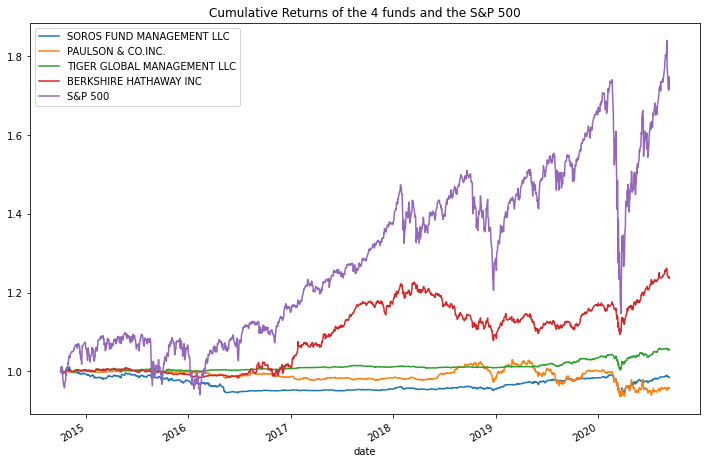

In [49]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(figsize=(12,8), title='Cumulative Returns of the 4 funds and the S&P 500')

In [50]:
## Analysis:
# Question Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?
# Answer: Based on the cumulative return data and the visualization, the S&P 500 outperformed all four funds over the span of the six years except in three brief instances in 2014, 2015, and the beginning of 2016. The S&P's responsiveness to market volatility is greater than any of the other four funds. It would be interesting to look at the beta of these four funds as a next step.

In [51]:
## Analyze the Volatility

<AxesSubplot:title={'center':'Volatility of the 4 funds and the S&P 500'}>

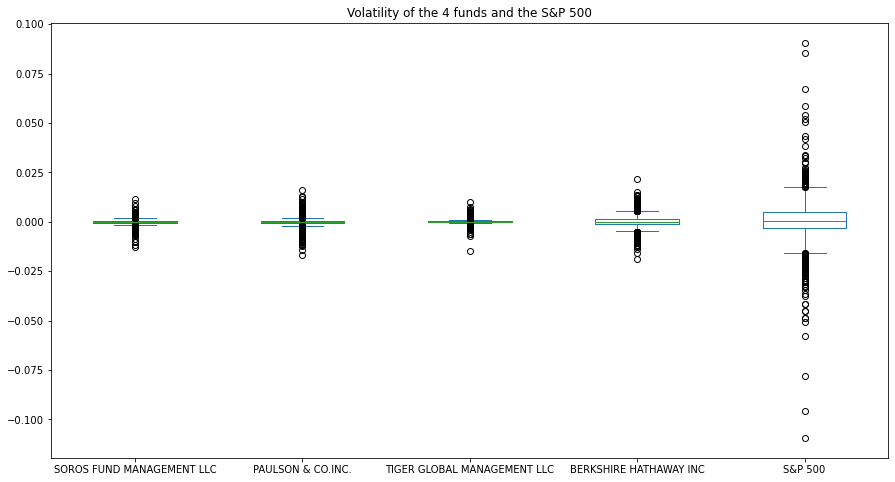

In [52]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot(kind='box', figsize=(15,8), title='Volatility of the 4 funds and the S&P 500')

In [71]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Using the Pandas drop function, remove the S&P 500 column
daily_returns_4_funds = daily_returns.drop(columns=['S&P 500'])

# Review the resulting DataFrame
daily_returns_4_funds.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


<AxesSubplot:title={'center':'Volatility of the 4 funds'}>

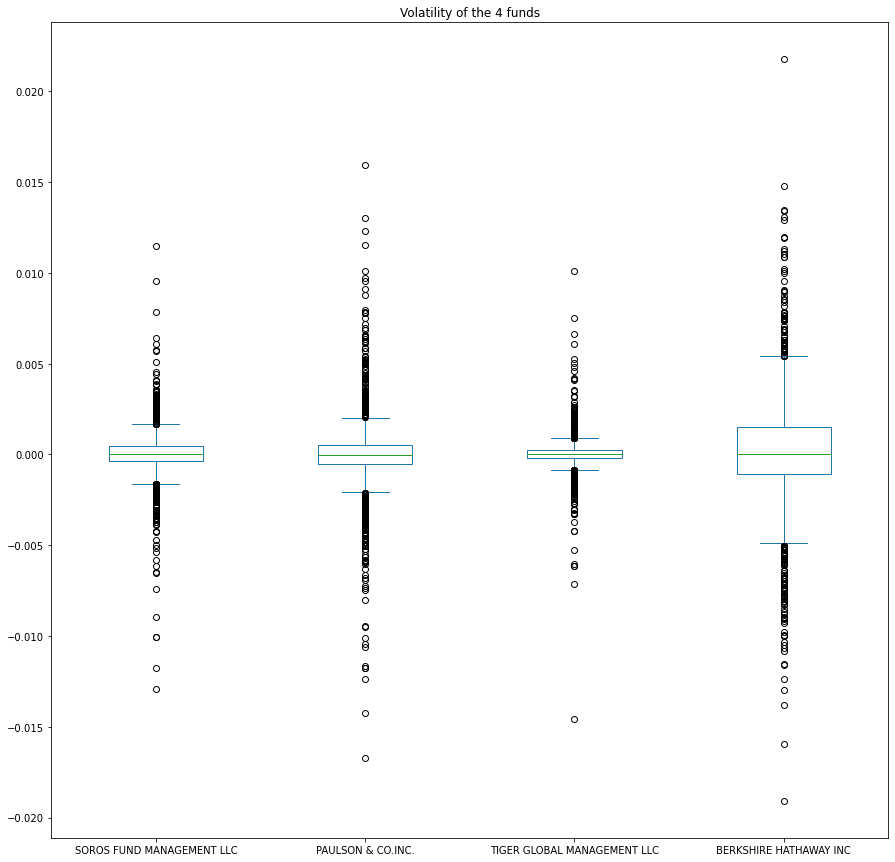

In [75]:
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
daily_returns_4_funds.plot(kind='box', figsize=(15,15), title='Volatility of the 4 funds')

In [76]:
## Analysis:
# Question Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?
# Answer: Based on the box plot visualization of just the four fund portfolios, the most volatile fund was Berkshire Hathaway Inc as seen with the greatest spread. The least volatile fund was Tiger Global Management LLC as seen with the smallest spread.